#TASK 1:

#Basic Template Matching (Single Match)
#Objective:
Find a given template (like a small object, logo, or face) inside a main image and mark it with a rectangle.
#Instructions:
1. Upload one source image and one template image.
2. Use OpenCV’s cv2.matchTemplate() with different methods:
cv2.TM_CCOEFF_NORMED
cv2.TM_SQDIFF_NORMED
cv2.TM_CCORR_NORMED
3. Display all results side-by-side and explain which method gave the best match and why (based on result brightness and location)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read Source and Template Images

In [ ]:

source_path = 'check.jpeg'
template_path = 'template.jpeg'
source = cv2.imread(source_path, 0)
template = cv2.imread(template_path, 0)

#Get Template Dimensions

In [ ]:

w, h = template.shape[::-1]

#Display the Original and Template Images

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(source, cmap='gray')
plt.title("Original Image (Source)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(template, cmap='gray')
plt.title("Template Image (Part to Match)")
plt.axis('off')

plt.suptitle("Original and Template Images", fontsize=14)
plt.show()


#Test Different Template Matching Methods

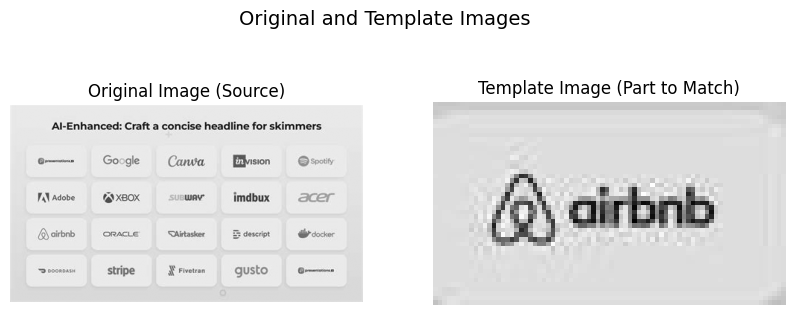

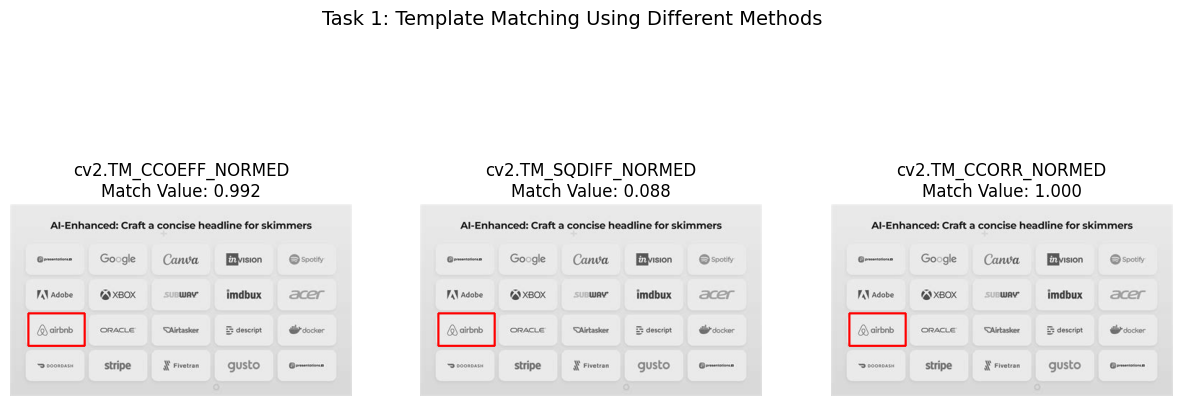

In [ ]:

methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_SQDIFF_NORMED', 'cv2.TM_CCORR_NORMED']

plt.figure(figsize=(15, 6))

for i, meth in enumerate(methods, 1):
    method = eval(meth)
    result = cv2.matchTemplate(source, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # For TM_SQDIFF methods, lower value means better match
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    matched = cv2.cvtColor(source, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(matched, top_left, bottom_right, (0, 0, 255), 2)

    plt.subplot(1, 3, i)
    plt.imshow(cv2.cvtColor(matched, cv2.COLOR_BGR2RGB))
    plt.title(f"{meth}\nMatch Value: {max_val:.3f}")
    plt.axis('off')

plt.suptitle("Task 1: Template Matching Using Different Methods", fontsize=14)
plt.show()


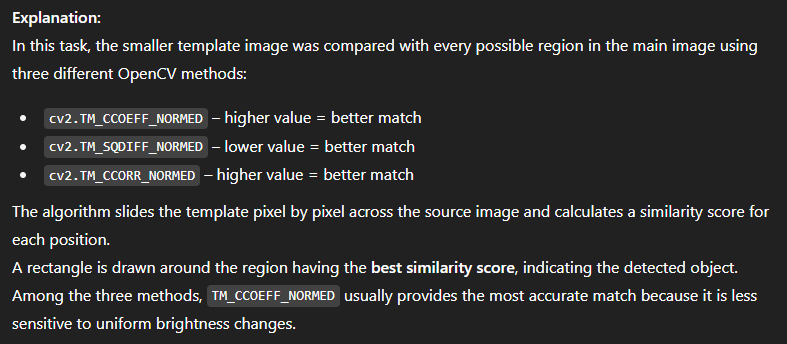

#TASK 2:

#Multi-Object Detection (Multiple Matches)
#Objective:
Detect all occurrences of the template in the image, not just one.
#Instructions:
1. Use cv2.matchTemplate() with cv2.TM_CCOEFF_NORMED .
2. Use a threshold (e.g., 0.8 ) to find all strong matches:
loc = np.where(result >= 0.8)
3. Draw rectangles around each detected region.
4. Display how many matches were found.


#Read Source and Template Images

In [ ]:

source_path = 'cards.jpeg'   # Main image
template_path = 'templatef.jpeg' # Template image (cropped object)

source = cv2.imread(source_path, 0)
template = cv2.imread(template_path, 0)

#Get Template Dimensions

In [ ]:

w, h = template.shape[::-1]

#Display Original and Template Images

In [ ]:


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(source, cmap='gray')
plt.title("Original Image (coins.jpeg)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(template, cmap='gray')
plt.title("Template Image (temp2.jpeg)")
plt.axis('off')
plt.suptitle("Source and Template Images", fontsize=14)
plt.show()

#Apply Template Matching using TM_CCOEFF_NORMED

In [ ]:

result = cv2.matchTemplate(source, template, cv2.TM_CCOEFF_NORMED)

#Use Threshold = 0.8 to Detect Multiple Matches

In [ ]:

threshold = 0.8
loc = np.where(result >= threshold)

#Draw Rectangles Around All Detected Matches

In [ ]:

matched = cv2.cvtColor(source, cv2.COLOR_GRAY2BGR)

for pt in zip(*loc[::-1]):  # Switch x and y
    cv2.rectangle(matched, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)


# Display Results

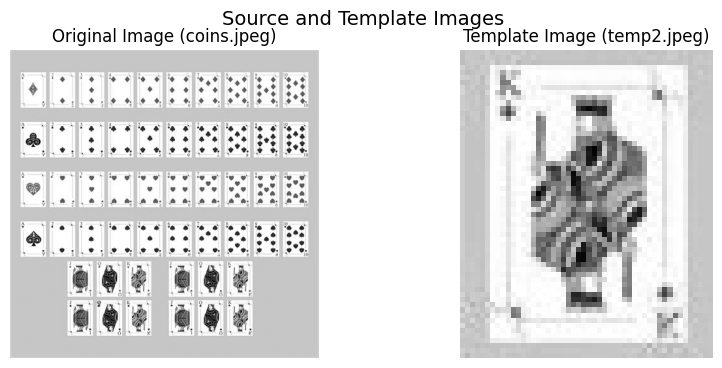

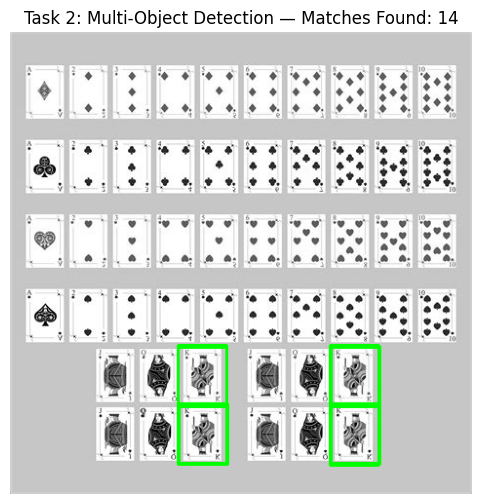

In [ ]:

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(matched, cv2.COLOR_BGR2RGB))
plt.title(f"Task 2: Multi-Object Detection — Matches Found: {count}")
plt.axis('off')
plt.show()




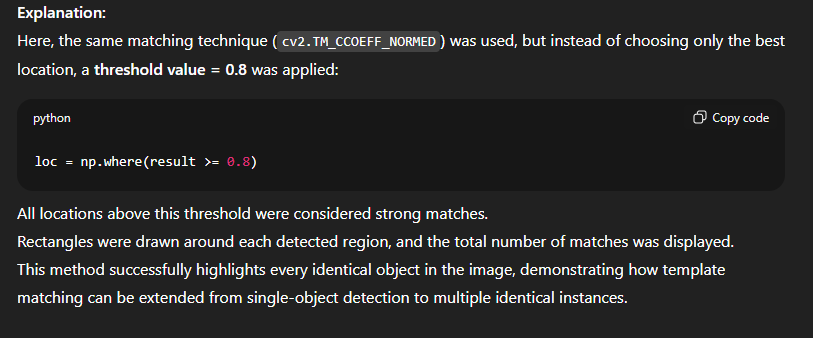

#Conclusion:

Through this lab, I learned how template matching in OpenCV works and how different correlation methods affect the accuracy of detection.

#In Task 1:
I understood how to identify a single object by comparing a small image region with a larger one.

#In Task 2:
I applied the same principle to locate multiple identical patterns using a threshold. I also realized that template matching is sensitive to scale, rotation, and lighting, and works best when the template and the objects are identical.